In [1]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Get started with BigQuery DataFrames

<table align="left">

  <td>
    <a href="https://colab.research.google.com/github/googleapis/python-bigquery-dataframes/blob/main/notebooks/getting_started/bq_dataframes_template.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Colab logo"> Run in Colab
    </a>
  </td>
  <td>
    <a href="https://github.com/googleapis/python-bigquery-dataframes/blob/main/notebooks/getting_started/bq_dataframes_template.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      View on GitHub
    </a>
  </td>
  <td>
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/googleapis/python-bigquery-dataframes/blob/main/notebooks/getting_started/bq_dataframes_template.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      Open in Vertex AI Workbench
    </a>
  </td>
  <td>
    <a href="https://console.cloud.google.com/bigquery/import?url=https://github.com/googleapis/python-bigquery-dataframes/blob/main/notebooks/getting_started/bq_dataframes_template.ipynb">
      <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTW1gvOovVlbZAIZylUtf5Iu8-693qS1w5NJw&s" alt="BQ logo" width="35">
      Open in BQ Studio
    </a>
  </td>

</table>

**_NOTE_**: This notebook has been tested in the following environment:

* Python version = 3.10

## Overview

BigQuery DataFrames (also known as BigFrames) provides a Pythonic DataFrame and machine learning (ML) API powered by the BigQuery engine.

* `bigframes.pandas` provides a pandas-like API for analytics.
* `bigframes.ml` provides a scikit-learn-like API for ML.
* `bigframes.ml.llm` provides API for large language models including Gemini.

You can learn more about [BigQuery DataFrames](https://cloud.google.com/bigquery/docs/bigquery-dataframes-introduction) and its [API reference](https://cloud.google.com/python/docs/reference/bigframes/latest).

For any issues or feedback please reach out to bigframes-feedback@google.com.

## Before you begin

Complete the tasks in this section to set up your environment.

### Install the python package

You need the [bigframes](https://pypi.org/project/bigframes/) python package to be installed. If you don't have that, uncomment and run the following cell and *restart the kernel*.

In [2]:
#%pip install  --upgrade bigframes

### Set your project id and location

Following are some quick references:

* Google Cloud Project: https://cloud.google.com/resource-manager/docs/creating-managing-projects.
* BigQuery Location: https://cloud.google.com/bigquery/docs/locations.

In [3]:
PROJECT_ID = ""  # @param {type: "string"}
LOCATION = "US"  # @param {type: "string"}

### Import library

In [4]:
import bigframes.pandas as bpd


### Set BigQuery DataFrames options

In [5]:
# Note: The project option is not required in all environments.
# For example, In BigQuery Studio, the project ID is automatically detected,
# But in Google Colab it must be set by the user.
bpd.options.bigquery.project = PROJECT_ID

# Note: The location option is not required.
# It defaults to the location of the first table or query
# passed to read_gbq(). For APIs where a location can't be
# auto-detected, the location defaults to the "US" location.
bpd.options.bigquery.location = LOCATION

# Note: BigQuery DataFrames objects are by default fully ordered like Pandas.
# If ordering is not important for you, you can uncomment the following
# expression to run BigQuery DataFrames in partial ordering mode.
#bpd.options.bigquery.ordering_mode = "partial"

# Note: By default BigQuery DataFrames emits out BigQuery job metadata via a
# progress bar. But in this notebook let's disable the progress bar to keep the
# experience less verbose. If you would like the default behavior, please
# comment out the following expression. 
bpd.options.display.progress_bar = None

If you want to reset the project and/or location of the created DataFrame or Series objects, reset the session by executing `bpd.close_session()`. After that, you can redo the above steps.

## Create a BigQuery DataFrames DataFrame

You can create a BigQuery DataFrames DataFrame by reading data from any of the
following locations:

* A local data file
* Data stored in a BigQuery table
* A data file stored in Cloud Storage
* An in-memory pandas DataFrame

Note that the DataFrame does not copy the data to the local memory, instead
keeps the underlying data in a BigQuery table during read and analysis. That's
how it can handle really large size of data (at BigQuery Scale) independent of
the local memory.

For simplicity, speed and cost efficiency, this tutorial uses the
[`penguins`](https://pantheon.corp.google.com/bigquery?ws=!1m5!1m4!4m3!1sbigquery-public-data!2sml_datasets!3spenguins)
table from BigQuery public data, which contains 27 KB data about a set of
penguins - species, island of residence, culmen length and depth, flipper length
and sex. There is a version of this data in the Cloud Storage
[cloud samples data](https://pantheon.corp.google.com/storage/browser/_details/cloud-samples-data/vertex-ai/bigframe/penguins.csv)
as well.

In [6]:
# This is how you read a BigQuery table
df = bpd.read_gbq("bigquery-public-data.ml_datasets.penguins")

# This is how you would read a csv from the Cloud Storage
#df = bpd.read_csv("gs://cloud-samples-data/vertex-ai/bigframe/penguins.csv")

We can use `peek` to preview a few rows (selected arbitrarily) from the dataframes:

In [7]:
df.peek()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
77,Adelie Penguin (Pygoscelis adeliae),Biscoe,37.8,20.0,190.0,4250.0,MALE
97,Gentoo penguin (Pygoscelis papua),Biscoe,44.9,13.8,212.0,4750.0,FEMALE
273,Adelie Penguin (Pygoscelis adeliae),Dream,36.9,18.6,189.0,3500.0,FEMALE
286,Gentoo penguin (Pygoscelis papua),Biscoe,45.1,14.4,210.0,4400.0,FEMALE
65,Adelie Penguin (Pygoscelis adeliae),Torgersen,46.0,21.5,194.0,4200.0,MALE


We just created a DataFrame, `df`, refering to the entirety of the source table data, without downloading it to the local machine.

## Inspect and manipulate data in BigQuery DataFrames

### Using pandas API

You can use pandas API on the BigQuery DataFrames DataFrame as you normally would in Pandas, but computation happens in the BigQuery query engine instead of your local environment.

Let's compute the mean of the `body_mass_g` series:

In [8]:
average_body_mass = df["body_mass_g"].mean()
print(f"average_body_mass: {average_body_mass}")

average_body_mass: 4201.754385964911


Calculate the mean `body_mass_g` by `species` using the `groupby` operation:

In [9]:
df[["species", "body_mass_g"]].groupby(by=df["species"]).mean(numeric_only=True)

,body_mass_g
species,
Adelie Penguin (Pygoscelis adeliae),3700.662252
Chinstrap penguin (Pygoscelis antarctica),3733.088235
Gentoo penguin (Pygoscelis papua),5076.01626


You can confirm that the calculations were run in BigQuery by clicking "Open job" from the previous cells' output. This takes you to the BigQuery console to view the SQL statement and job details.

### Using SQL functions

The [bigframes.bigquery module](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.bigquery) provides many [BigQuery SQL functions](https://cloud.google.com/bigquery/docs/reference/standard-sql/functions-all) which may not have a pandas-equivalent.

In [10]:
import bigframes.bigquery

The `bigframes.bigquery.struct()` function creates a new STRUCT Series with subfields for each column in a DataFrames.

In [11]:
lengths = bigframes.bigquery.struct(
    df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm"]]
)
lengths.peek()

133    {'culmen_length_mm': None, 'culmen_depth_mm': ...
279    {'culmen_length_mm': 37.9, 'culmen_depth_mm': ...
34     {'culmen_length_mm': 37.8, 'culmen_depth_mm': ...
208    {'culmen_length_mm': 40.5, 'culmen_depth_mm': ...
96     {'culmen_length_mm': 37.7, 'culmen_depth_mm': ...
dtype: struct<culmen_length_mm: double, culmen_depth_mm: double, flipper_length_mm: double>[pyarrow]

Use the `bigframes.bigquery.sql_scalar()` function to access arbitrary SQL syntax representing a single column expression.

In [12]:
shortest = bigframes.bigquery.sql_scalar(
    "LEAST({0}, {1}, {2})",
    columns=[df['culmen_depth_mm'], df['culmen_length_mm'], df['flipper_length_mm']],
)
shortest.peek()

116    <NA>
308    15.5
285    15.9
2      16.0
295    16.1
dtype: Float64

## Visualize data

### First party visualizations

BigQuery DataFrames provides a number of visualizations via the `plot` method and [accessor](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.operations.plotting.PlotAccessor) on the DataFrame and Series objects.

<Axes: title={'center': 'Numeric features'}>

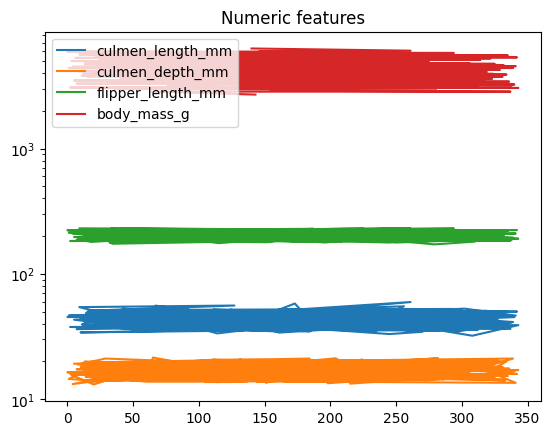

In [13]:
df.sort_values("body_mass_g").plot(title="Numeric features", logy=True)

<Axes: xlabel='species'>

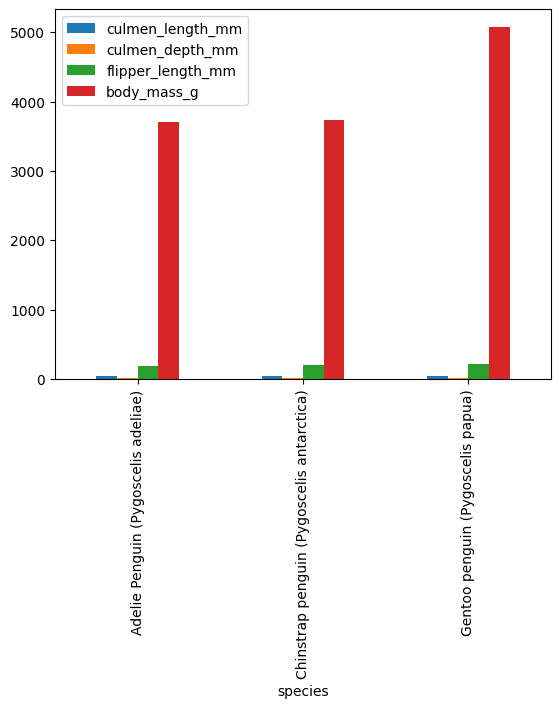

In [14]:
means = df.groupby("species").mean(numeric_only=True)
means.plot.bar()

### Integration with open source visualizations

BigQuery Dataframes is also compatible with several open source visualization packages, such as `matplotlib`.

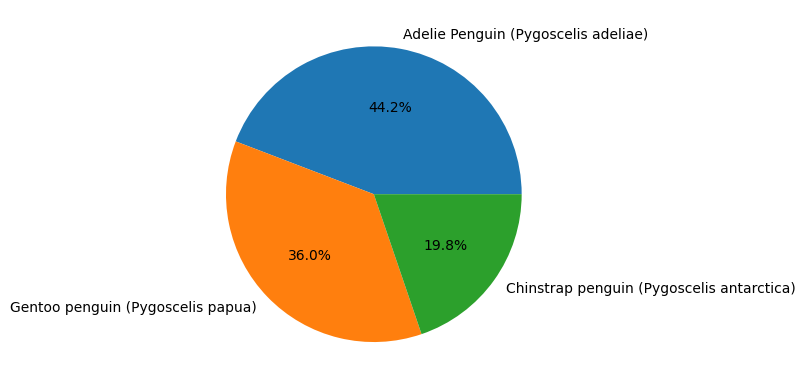

In [15]:
import matplotlib.pyplot as plt

# plotting a histogram
species_counts = df["species"].value_counts()
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%')
plt.show()

## Pandas interoperability

BigQuery DataFrames can be converted from and to Pandas DataFrame with `to_pandas` and `read_pandas` respectively.
This could be handy to take advantage of the capabilities of the two systems.

> Note: `to_pandas` converts the BigQuery DataFrame to Pandas DataFrame by bringing all the data in memory, which would be an issue
for large data, as your machine may not have enough memory to accommodate that.

In [16]:
def print_type(df):
    print(f"\nWe have a dataframe of {type(df)}\n")

# The original bigframes dataframe
cur_df = df
print_type(cur_df)

# Convert to pandas dataframe
cur_df = cur_df.to_pandas()
print_type(cur_df)

# Convert back to bigframes dataframe
cur_df = bpd.read_pandas(cur_df)
print_type(cur_df)


We have a dataframe of <class 'bigframes.dataframe.DataFrame'>


We have a dataframe of <class 'pandas.core.frame.DataFrame'>


We have a dataframe of <class 'bigframes.dataframe.DataFrame'>



## Machine Learning with BigQuery DataFrames

### Clean and prepare data

We're are going to start with supervised learning, where a Linear Regression model will learn to predict the body mass (output variable `y`) using input features such as flipper length, sex, species, and more (features `X`).

In [17]:
# Drop any rows that has missing (NA) values
df = df.dropna()

Part of preparing data for a machine learning task is splitting it into subsets for training and testing to ensure that the solution is not overfitting. By default, BQML will automatically manage splitting the data for you. However, BQML also supports manually splitting out your training data.

Performing a manual data split can be done with `bigframes.ml.model_selection.train_test_split` like so:

In [18]:
from bigframes.ml.model_selection import train_test_split


# This will split df into test and training sets, with 20% of the rows in the test set,
# and the rest in the training set
df_train, df_test = train_test_split(df, test_size=0.2)

# Show the shape of the data after the split
print(f"""
    df_train shape: {df_train.shape}
    df_test shape: {df_test.shape}
""")


    df_train shape: (267, 7)
    df_test shape: (67, 7)



In [19]:
# Isolate input features and output variable into DataFrames
X_train = df_train[[
    'island',
    'culmen_length_mm',
    'culmen_depth_mm',
    'flipper_length_mm',
    'sex',
    'species',
]]
y_train = df_train[['body_mass_g']]

X_test = df_test[[
    'island',
    'culmen_length_mm',
    'culmen_depth_mm',
    'flipper_length_mm',
    'sex',
    'species',
    # Include the actual body_mass_g so that we can compare with the predicted
    # without a join.
    'body_mass_g'
]]
y_test = df_test[['body_mass_g']]

# Print the shapes of features and label
print(f"""
    X_train shape: {X_train.shape}
    X_test shape: {X_test.shape}
    y_train shape: {y_train.shape}
    y_test shape: {y_test.shape}
""")


    X_train shape: (267, 6)
    X_test shape: (67, 7)
    y_train shape: (267, 1)
    y_test shape: (67, 1)



### Define pipeline

This step is subjective to the problem. Although a model can be directly trained on the original data, it is often useful to apply some preprocessing to the original data.
In this example we want to apply a [`ColumnTransformer`](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.ml.compose.ColumnTransformer) in which we apply [`OneHotEncoder`](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.ml.preprocessing.OneHotEncoder) to the category features and [`StandardScaler`](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.ml.preprocessing.StandardScaler) to the numeric features.

In [20]:
from bigframes.ml.linear_model import LinearRegression
from bigframes.ml.pipeline import Pipeline
from bigframes.ml.compose import ColumnTransformer
from bigframes.ml.preprocessing import StandardScaler, OneHotEncoder

preprocessing = ColumnTransformer([
    ("onehot", OneHotEncoder(), ["island", "species", "sex"]),
    ("scaler", StandardScaler(), ["culmen_depth_mm", "culmen_length_mm", "flipper_length_mm"]),
])

model = LinearRegression(fit_intercept=False)

pipeline = Pipeline([
    ('preproc', preprocessing),
    ('linreg', model)
])

# View the pipeline
pipeline

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['island', 'species', 'sex']),
                                                 ('scaler', StandardScaler(),
                                                  ['culmen_depth_mm',
                                                   'culmen_length_mm',
                                                   'flipper_length_mm'])])),
                ('linreg', LinearRegression(fit_intercept=False))])

### Train and Predict

Supervised learning is when we train a model on input-output pairs, and then ask it to predict the output for new inputs. An example of such a predictor is `bigframes.ml.linear_models.LinearRegression`.

In [21]:
# Learn from the training data how to predict output y
pipeline.fit(X_train, y_train)

# Predict y for the test data
y_pred = pipeline.predict(X_test)

# View predictions preview
y_pred.peek()

,predicted_body_mass_g,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex,species,body_mass_g
20,4636.821089,Biscoe,42.9,13.1,215.0,FEMALE,Gentoo penguin (Pygoscelis papua),5000.0
151,4564.698311,Biscoe,42.0,13.5,210.0,FEMALE,Gentoo penguin (Pygoscelis papua),4150.0
194,4650.79465,Biscoe,45.3,13.7,210.0,FEMALE,Gentoo penguin (Pygoscelis papua),4300.0
105,4613.791453,Biscoe,40.9,13.7,214.0,FEMALE,Gentoo penguin (Pygoscelis papua),4650.0
60,4731.406935,Biscoe,45.2,13.8,215.0,FEMALE,Gentoo penguin (Pygoscelis papua),4750.0


### Evaluate results

Some models include a convenient `.score(X, y)` method for evaulation with a preset accuracy metric:

In [22]:
pipeline.score(X_test.drop(columns=["body_mass_g"]), y_test)

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,236.397487,87218.80835,0.005214,194.28155,0.839539,0.840426


For a more general approach, the library `bigframes.ml.metrics` is provided:

In [23]:
from bigframes.ml.metrics import r2_score

r2_score(y_pred['body_mass_g'], y_pred["predicted_body_mass_g"])

np.float64(0.8395390042903277)

## Generative AI with BigQuery DataFrames

BigQuery DataFrames integration with the Large Language Models (LLM) supported by BigQuery ML. Check out the [`bigframes.ml.llm`](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.ml.llm) module for all the available models.

To use this feature you would need to have a few additional APIs enabled and IAM roles configured. Please make sure of that by following [this documentation](https://cloud.google.com/bigquery/docs/use-bigquery-dataframes#remote-models) and then uncomment the code in the following cells to try out the integration with Gemini.

### Create prompts

A "prompt" text column can be initialized either directly or via the pandas APIs. For simplicity let's use a direct initialization here.

In [24]:
# df = bpd.DataFrame(
#         {
#             "prompt": ["What is BigQuery?", "What is BQML?", "What is BigQuery DataFrames?"],
#         })
# df

### Generate responses

Here we will use the [`GeminiTextGenerator`](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.ml.llm.GeminiTextGenerator) LLM to answer the questions. Read the API documentation for all the model versions supported via the `model_name` param.

In [25]:
# from bigframes.ml.llm import GeminiTextGenerator

# model = GeminiTextGenerator(model_name="gemini-1.5-flash-002")

# pred = model.predict(df)
# pred

Let's print the full text response for the question "What is BigQuery DataFrames?".

In [26]:
# print(pred.loc[2]["ml_generate_text_llm_result"])

## Cleaning up

To clean up all Google Cloud resources used in this project, you can [delete the Google Cloud
project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#shutting_down_projects) you used for the tutorial.

To remove any temporary cloud artifacts (inclusing BQ tables) created in the current BigQuery DataFrames session, simply call `close_session`.

In [27]:
# Delete the temporary cloud artifacts created during the bigframes session 
bpd.close_session()

## Summary and next steps

1. You created BigQuery DataFrames objects, and inspected and manipulated data with pandas APIs at BigQuery scale and speed.

1. You also created ML model from a DataFrame and used them to run predictions on another DataFrame.

1. You got access to Google's state-of-the-art Gemini LLM through simple pythonic API.

Learn more about BigQuery DataFrames in the documentation [BigQuery DataFrames](https://cloud.google.com/bigquery/docs/bigquery-dataframes-introduction) and its [API reference](https://cloud.google.com/python/docs/reference/bigframes/latest).

Also, find more sample notebooks in the [GitHub repo](https://github.com/googleapis/python-bigquery-dataframes/tree/main/notebooks), including the [pypi.ipynb](https://github.com/googleapis/python-bigquery-dataframes/blob/main/notebooks/dataframes/pypi.ipynb) that processes 400+ TB data at the cost and efficiency close to direct SQL by taking advantage of the [partial ordering](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes._config.bigquery_options.BigQueryOptions#bigframes__config_bigquery_options_BigQueryOptions_ordering_mode) mode.